In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
import cv2

In [2]:
digits = load_digits()

In [3]:
len(digits.images)

1797

In [10]:
X = np.array(digits.images).reshape(-1,8,8,1)

In [15]:
training = []
for i in range(len(X)):
    training.append(cv2.resize(X[i],(25,25)))

In [16]:
np.array(training).shape

(1797, 25, 25)

In [18]:
X = np.array(training).reshape(-1,25,25,1)

In [19]:
X.shape

(1797, 25, 25, 1)

In [20]:
y = digits.target

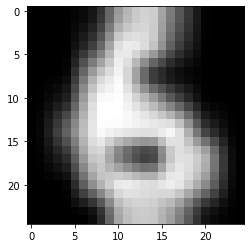

In [21]:
IMG_SIZE = 25
new_array = cv2.resize(training[412],(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array,cmap = 'gray')
plt.show()

In [22]:
new_array.shape

(25, 25)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [24]:
X_train.shape

(1437, 25, 25, 1)

In [25]:
X_test.shape

(360, 25, 25, 1)

In [26]:
y_test.shape

(360,)

In [27]:
from tensorflow import keras

In [28]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(25,25,1)),
	keras.layers.Dense(128,activation="relu"),
	keras.layers.Dense(10,activation="softmax")])

In [29]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [30]:
model.fit(X_train, y_train,epochs=50,batch_size=1000)

Epoch 1/50
2/2 [==============================] - 0s 4ms/step - loss: 10.4432 - accuracy: 0.1204
Epoch 2/50
2/2 [==============================] - 0s 4ms/step - loss: 4.9017 - accuracy: 0.2902
Epoch 3/50
2/2 [==============================] - 0s 4ms/step - loss: 4.4731 - accuracy: 0.4078
Epoch 4/50
2/2 [==============================] - 0s 4ms/step - loss: 2.7131 - accuracy: 0.5491
Epoch 5/50
2/2 [==============================] - 0s 8ms/step - loss: 1.5459 - accuracy: 0.6249
Epoch 6/50
2/2 [==============================] - 0s 4ms/step - loss: 0.9417 - accuracy: 0.7001
Epoch 7/50
2/2 [==============================] - 0s 4ms/step - loss: 0.6828 - accuracy: 0.7815
Epoch 8/50
2/2 [==============================] - 0s 4ms/step - loss: 0.8256 - accuracy: 0.7432
Epoch 9/50
2/2 [==============================] - 0s 4ms/step - loss: 0.5547 - accuracy: 0.8295
Epoch 10/50
2/2 [==============================] - 0s 4ms/step - loss: 0.3440 - accuracy: 0.8803
Epoch 11/50
2/2 [=====================

In [31]:
class_names = ["0","1","2","3","4","5","6","7","8","9"]

12/12 [==============================] - 0s 1ms/step - loss: 0.0691 - accuracy: 0.9806
tested Acc: 0.980555534362793


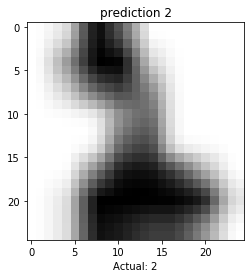

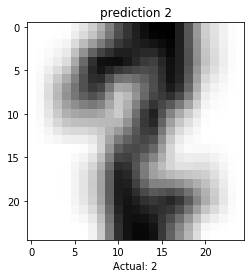

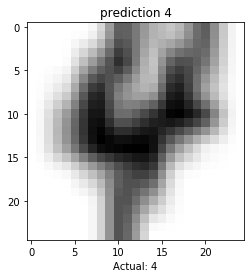

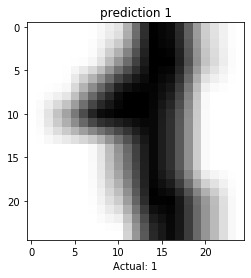

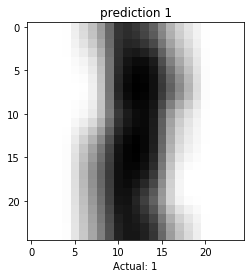

In [58]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("tested Acc:",test_acc)
prediction = model.predict(X_test)

for i in range(214,219):
    plt.grid(False)
    new_array = cv2.resize(X_test[i],(IMG_SIZE,IMG_SIZE))
    plt.imshow(new_array,cmap=plt.cm.binary)
    plt.xlabel("Actual: "+class_names[y_test[i]])
    plt.title("prediction "+class_names[np.argmax(prediction[i])])
    plt.show()

In [33]:
import os 
directory = os.path.join(os.getcwd(),'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path = os.path.join(directory,'digits-25-trained-model.h5')
model.save(model_path)

In [ ]:
# model = keras.models.load_model('saved_models/digits-trained-model.h5')


In [74]:
import pickle
pickle_in = open("num.pickle","rb")
X = pickle.load(pickle_in)

In [75]:
def get_image(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return cv2.resize(img,(25,25))

In [76]:
X = get_image(X)

In [77]:
X.shape

(25, 25)

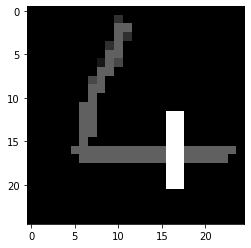

In [78]:
IMG_SIZE = 25
new_array = cv2.resize(X,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array,cmap = 'gray')
plt.show()

In [79]:
X.shape

(25, 25)

In [80]:
new_array=X.reshape(-1,25,25,1)

In [81]:
new_array

array([[[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],

        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 35],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],

        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [ 69],
         [ 69],
    

In [82]:
new_array.shape

(1, 25, 25, 1)

In [83]:
prediction = model.predict(new_array)
prediction.shape

(1, 10)

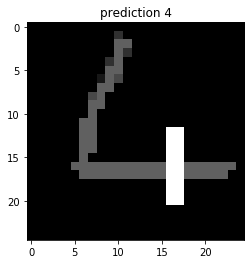

In [84]:
plt.grid(False)
new_array = cv2.resize(X,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array,cmap=plt.cm.gray)

plt.title("prediction "+class_names[np.argmax(prediction[0])])
plt.show()

In [85]:
def plot_image(prediction, img):
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(prediction)
    plt.xlabel("{} {:2.0f}%".format(class_names[predicted_label],
               100*np.max(prediction),
               ),
                color="blue")
def plot_value_array(prediction):
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), prediction, color="#888888")
    plt.ylim([0,1])
    predicted_label = np.argmax(prediction)
    thisplot[predicted_label].set_color('blue')

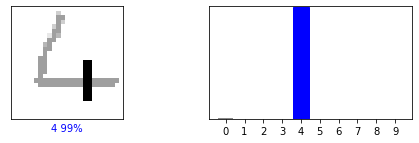

In [86]:
plt.figure(figsize=(8,12))
plt.subplot(5, 2, 1)
plot_image(prediction[0], new_array)
# bar chart
plt.subplot(5, 2, 2)
plot_value_array(prediction[0])
plt.show()  